# Actividad 6 Visualización

Profesora: Dra. María de la Paz Rico Fernández

Visualización

Emmanuel Gonzalez Calitl A01320739 

01 Noviembre 2022

# **The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients**

Los datos relacionados con esta investigación se relacionan con el caso de los pagos por incumplimiento de los clientes en un banco en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento de pago. 

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import graphviz
import math
import pydotplus
import missingno as msno
import seaborn as sns  
import seaborn as load_dataset
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer

import warnings

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from scipy.stats import boxcox
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, train_test_split, cross_validate, learning_curve, RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier



In [56]:
#1. Creación del data frame

path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(path, index_col=0)  #, header = 0, 

df.rename(columns = {
    'X1':'credit',
    'X2':'genre',
    'X3':'education',
    'X4':'Marital_Status',
    'X5':'age',
    'X6':'rep_sep',
    'X7':'rep_aug',
    'X8':'rep_jul',
    'X9':'rep_jun',
    'X10':'rep_may',
    'X11':'rep_apr',
    'X12':'bill_sep',
    'X13':'bill_aug',
    'X14':'bill_jul',
    'X15':'bill_jun',
    'X16':'bill_may',
    'X17':'bill_apr',
    'X18':'pay_sep',
    'X19':'pay_aug',
    'X20':'pay_jul',
    'X21':'pay_jun',
    'X22':'pay_may',
    'X23':'pay_apr',
 }, inplace = True)
#El inplace true, nos permite hacer la mutación sobre el mismo dataframe, sin necesidad de crear otro nuevo
df.head()

,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [57]:
df

,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [58]:

df.describe()

,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [59]:
df.shape

(30000, 24)

In [60]:
df.columns

Index(['credit', 'genre', 'education', 'Marital_Status', 'age', 'rep_sep',
       'rep_aug', 'rep_jul', 'rep_jun', 'rep_may', 'rep_apr', 'bill_sep',
       'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'pay_sep',
       'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'Y'],
      dtype='object')

In [61]:
df.head()

,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [62]:
df.dtypes

credit              int64
genre             float64
education         float64
Marital_Status    float64
age               float64
rep_sep           float64
rep_aug           float64
rep_jul           float64
rep_jun           float64
rep_may           float64
rep_apr           float64
bill_sep          float64
bill_aug          float64
bill_jul          float64
bill_jun          float64
bill_may          float64
bill_apr          float64
pay_sep           float64
pay_aug           float64
pay_jul           float64
pay_jun           float64
pay_may           float64
pay_apr           float64
Y                 float64
dtype: object

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit          30000 non-null  int64  
 1   genre           29999 non-null  float64
 2   education       29998 non-null  float64
 3   Marital_Status  29998 non-null  float64
 4   age             29995 non-null  float64
 5   rep_sep         29997 non-null  float64
 6   rep_aug         29995 non-null  float64
 7   rep_jul         29993 non-null  float64
 8   rep_jun         29991 non-null  float64
 9   rep_may         29984 non-null  float64
 10  rep_apr         29986 non-null  float64
 11  bill_sep        29989 non-null  float64
 12  bill_aug        29989 non-null  float64
 13  bill_jul        29987 non-null  float64
 14  bill_jun        29985 non-null  float64
 15  bill_may        29983 non-null  float64
 16  bill_apr        29990 non-null  float64
 17  pay_sep         29992 non-null 

In [64]:
df.isna()

,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [65]:
df.isnull().values.any()

True

In [66]:
df.isnull().any()

credit            False
genre              True
education          True
Marital_Status     True
age                True
rep_sep            True
rep_aug            True
rep_jul            True
rep_jun            True
rep_may            True
rep_apr            True
bill_sep           True
bill_aug           True
bill_jul           True
bill_jun           True
bill_may           True
bill_apr           True
pay_sep            True
pay_aug            True
pay_jul            True
pay_jun            True
pay_may            True
pay_apr            True
Y                  True
dtype: bool

In [67]:

df[df.isnull()]

,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
ndf = df.copy()         #Se crea copia de la base de datos original

ndf.dropna(inplace = True)      #Se eliminan los renglones con valores NaN 
ndf.isna().values.any()         #Se muestra que ya no existen valores NaN

False

In [69]:
ndf

,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [70]:
print("'nulos' :\n ", ndf.isnull().sum())
print("\n")

ndf.isnull()

'nulos' :
  credit            0
genre             0
education         0
Marital_Status    0
age               0
rep_sep           0
rep_aug           0
rep_jul           0
rep_jun           0
rep_may           0
rep_apr           0
bill_sep          0
bill_aug          0
bill_jul          0
bill_jun          0
bill_may          0
bill_apr          0
pay_sep           0
pay_aug           0
pay_jul           0
pay_jun           0
pay_may           0
pay_apr           0
Y                 0
dtype: int64




,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [71]:
ndf.describe()

,credit,genre,education,Marital_Status,age,rep_sep,rep_aug,rep_jul,rep_jun,rep_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# Realiza el conteo de las variables categóricas

In [72]:
#Columnas categóricas
vars_cate = ['genre','education','Marital_Status', 'rep_sep','rep_aug','rep_jul','rep_jun','rep_may','rep_apr']
#Columnas ordinales o discretas cuantitativas: 
vars_ord = ['']
#Columnas numéricas o cuantitativas: 
vars_num = ['credit', 'age','bill_sep','bill_aug','bill_jul','bill_jun','bill_may','bill_apr','pay_sep','pay_aug','pay_jul','pay_jun','pay_may','pay_apr']


In [73]:
#Revisión de los posibles valores de cada propiedad categóricas
for n in vars_cate:
  print(n + ": ", ndf[n].unique())

genre:  [2. 1.]
education:  [2. 1. 3. 5. 4. 6. 0.]
Marital_Status:  [1. 2. 3. 0.]
rep_sep:  [ 2. -1.  0. -2.  1.  3.  4.  8.  7.  5.  6.]
rep_aug:  [ 2.  0. -1. -2.  3.  5.  7.  4.  1.  6.  8.]
rep_jul:  [-1.  0.  2. -2.  3.  4.  6.  7.  1.  5.  8.]
rep_jun:  [-1.  0. -2.  2.  3.  4.  5.  7.  6.  1.  8.]
rep_may:  [-2.  0. -1.  2.  3.  5.  4.  7.  8.  6.]
rep_apr:  [-2.  2.  0. -1.  3.  6.  4.  7.  8.  5.]


# Escala los datos, si consideras necesario

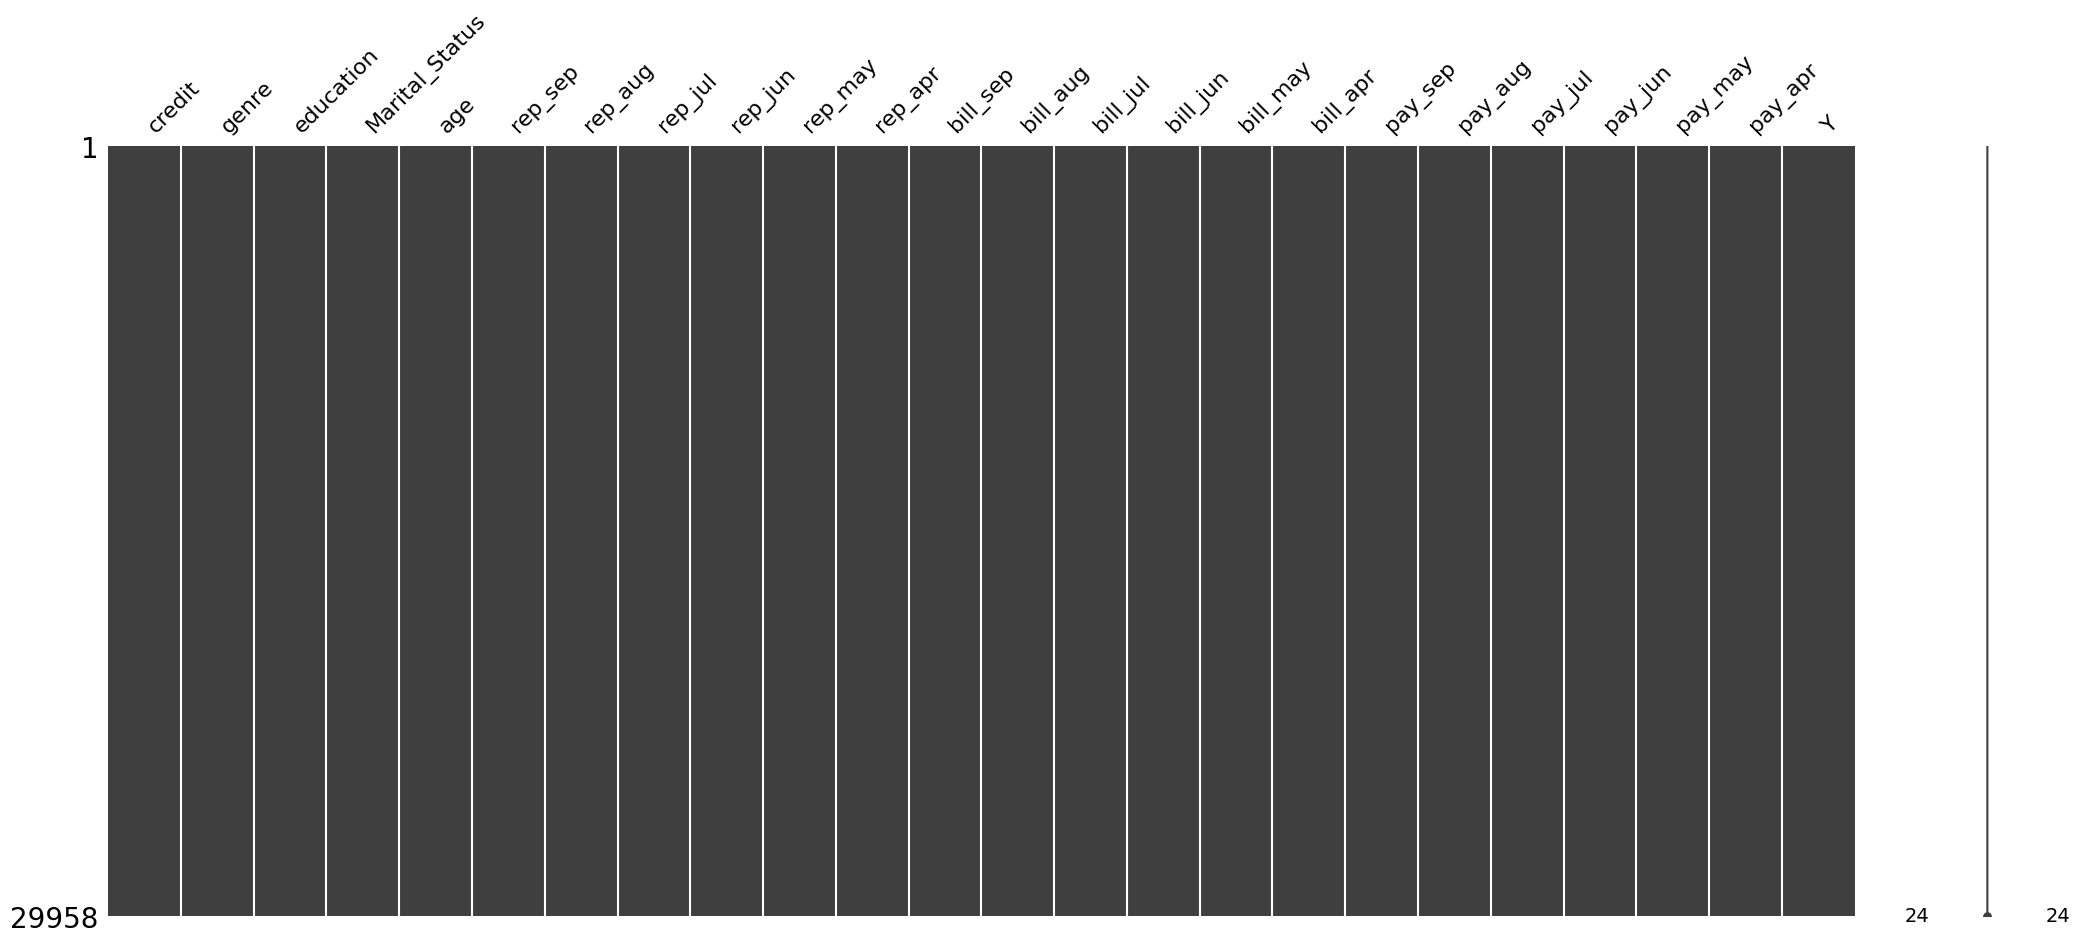

In [74]:
# Grafica de datos faltantes en los datos de entrada
msno.matrix(ndf)

In [75]:
#Transformación y normalización de los datos númericos
warnings.filterwarnings("ignore")

num_pipeline = Pipeline(steps = [('impPromedio', SimpleImputer(strategy='mean')),
                                 ('log', FunctionTransformer(np.sqrt)),
                                 ('scalar', MinMaxScaler(feature_range=(0,1)))])

TCC1_num = ndf[vars_num].copy()

columnasTransformerNum = ColumnTransformer(transformers = [('numerical', num_pipeline, vars_num)])
TCC1Fit = columnasTransformerNum.fit(TCC1_num)
TCC1Transf = TCC1Fit.transform(TCC1_num)
TCC1Transf


array([[0.04602373, 0.07348625, 0.06369441, ..., 0.        , 0.        ,
        0.        ],
       [0.27378907, 0.11994648, 0.05273219, ..., 0.04012862, 0.        ,
        0.06150697],
       [0.22222222, 0.28994119, 0.17411158, ..., 0.04012862, 0.0484201 ,
        0.09725105],
       ...,
       [0.08133898, 0.34842538, 0.06079616, ..., 0.08223919, 0.06847637,
        0.07657556],
       [0.20315857, 0.42283088,        nan, ..., 0.05569066, 0.35238394,
        0.05841543],
       [0.13734089, 0.51090318, 0.22291823, ..., 0.04012862, 0.0484201 ,
        0.04349199]])

In [76]:
df_num1 = pd.DataFrame(TCC1Transf, columns = [vars_num])
df_num1

,credit,age,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr
0,0.046024,0.073486,0.063694,0.056149,0.020348,0.000000,0.000000,0.000000,0.000000,0.020226,0.000000,0.000000,0.000000,0.000000
1,0.273789,0.119946,0.052732,0.041871,0.040146,0.060579,0.061044,0.058232,0.000000,0.024367,0.033407,0.040129,0.000000,0.061507
2,0.222222,0.289941,0.174112,0.119399,0.090266,0.126782,0.126973,0.127157,0.041686,0.029843,0.033407,0.040129,0.048420,0.097251
3,0.137341,0.348425,0.220724,0.221406,0.172106,0.178205,0.176731,0.175285,0.047849,0.034623,0.036595,0.042087,0.050063,0.043492
4,0.137341,0.689160,0.094520,0.075912,0.146746,0.153252,0.143701,0.141045,0.047849,0.147576,0.105642,0.120386,0.040192,0.035838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.410046,0.386105,0.442606,0.442678,0.353854,0.314174,0.183550,0.128907,0.098643,0.108971,0.074723,0.070047,0.108271,0.043492
29954,0.319220,0.458671,0.041772,0.043103,0.045874,0.100353,0.074818,0.000000,0.045857,0.045755,0.100210,0.014413,0.000000,0.000000
29955,0.081339,0.348425,0.060796,0.058402,0.040711,0.153025,0.148992,0.141875,0.000000,0.000000,0.156692,0.082239,0.068476,0.076576
29956,0.203159,0.422831,NaN,0.282239,0.214134,0.243292,0.113076,0.225599,0.313583,0.044989,0.036258,0.055691,0.352384,0.058415


Reduce las dimensiones con PCA, si consideras necesario.
Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
Indica la importancia de las variables en cada componente

In [82]:
df_num1.dropna(inplace = True)
df_num1.isna().values.any()

df_num1

,credit,age,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr
0,0.046024,0.073486,0.063694,0.056149,0.020348,0.000000,0.000000,0.000000,0.000000,0.020226,0.000000,0.000000,0.000000,0.000000
1,0.273789,0.119946,0.052732,0.041871,0.040146,0.060579,0.061044,0.058232,0.000000,0.024367,0.033407,0.040129,0.000000,0.061507
2,0.222222,0.289941,0.174112,0.119399,0.090266,0.126782,0.126973,0.127157,0.041686,0.029843,0.033407,0.040129,0.048420,0.097251
3,0.137341,0.348425,0.220724,0.221406,0.172106,0.178205,0.176731,0.175285,0.047849,0.034623,0.036595,0.042087,0.050063,0.043492
4,0.137341,0.689160,0.094520,0.075912,0.146746,0.153252,0.143701,0.141045,0.047849,0.147576,0.105642,0.120386,0.040192,0.035838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29952,0.203159,0.289941,0.274275,0.281029,0.218413,0.294864,0.298489,0.290505,0.089517,0.045586,0.000000,0.106170,0.000000,0.086984
29953,0.410046,0.386105,0.442606,0.442678,0.353854,0.314174,0.183550,0.128907,0.098643,0.108971,0.074723,0.070047,0.108271,0.043492
29954,0.319220,0.458671,0.041772,0.043103,0.045874,0.100353,0.074818,0.000000,0.045857,0.045755,0.100210,0.014413,0.000000,0.000000
29955,0.081339,0.348425,0.060796,0.058402,0.040711,0.153025,0.148992,0.141875,0.000000,0.000000,0.156692,0.082239,0.068476,0.076576


In [83]:
pcs = PCA(n_components = .725) # AL SER >70% SE OPTÓ POR UN 72.5%

pcs.fit_transform(df_num1)

df_num1_transformed = pd.DataFrame(pcs.components_)



pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )

pcsSummary.columns = ['PC1','PC2','PC3']

pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

pcsSummary

,0,1,2
PC1,0.322697,0.186256,0.160975
PC2,0.541458,0.180383,0.134739
PC3,0.541458,0.721841,0.856580


In [84]:
print( pcs.explained_variance_  )
print(abs( pcs.components_ ))

[0.10413344 0.03469123 0.02591303]
[[0.18758759 0.03991801 0.41169553 0.41270732 0.31473206 0.41910236
  0.39790223 0.38200727 0.07988045 0.05638301 0.07680331 0.08990925
  0.10815947 0.09590253]
 [0.63152505 0.74523537 0.08084729 0.08771943 0.06290429 0.07797735
  0.06945854 0.05895318 0.03201414 0.02730709 0.03797055 0.04345374
  0.06220764 0.06528108]
 [0.71002156 0.66510798 0.07919394 0.08401357 0.0566058  0.05868084
  0.04761285 0.03656436 0.04884599 0.03908044 0.05744409 0.06665566
  0.092164   0.09883819]]


Conclusión PCA:


Elabora los histogramas de los atributos para visualizar su distribución

In [77]:
#Función que grafica un histograma de acuerdo a los parámetros predefinidos
def plot_hist(TCC1_num):
  #Tamaño de la figura
  sns.set(rc={'figure.figsize':(50,4)})
  len_col = len(TCC1_num.columns)
  # ventana de 1x3 nichos para incluir en cada uno de ellos un gráfico.
  fig, axes = plt.subplots(1, len_col)
  for k in range(0,len_col):
    plt.subplot(1, len_col, k+1)
    # TCC1.columns devuelve una lista con los nombres de las columnas.
    plt.hist(ndf[TCC1_num.columns[k]], bins=10)
    plt.xlabel(TCC1_num.columns[k])
  plt.show()

  TCC1_num.describe()
 

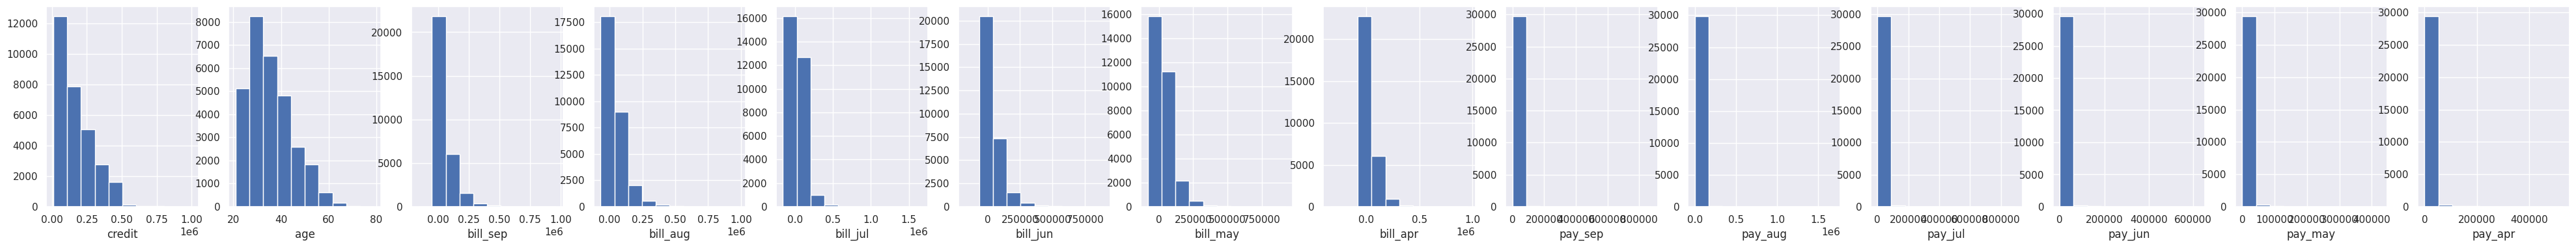

In [78]:
plot_hist(TCC1_num)

Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

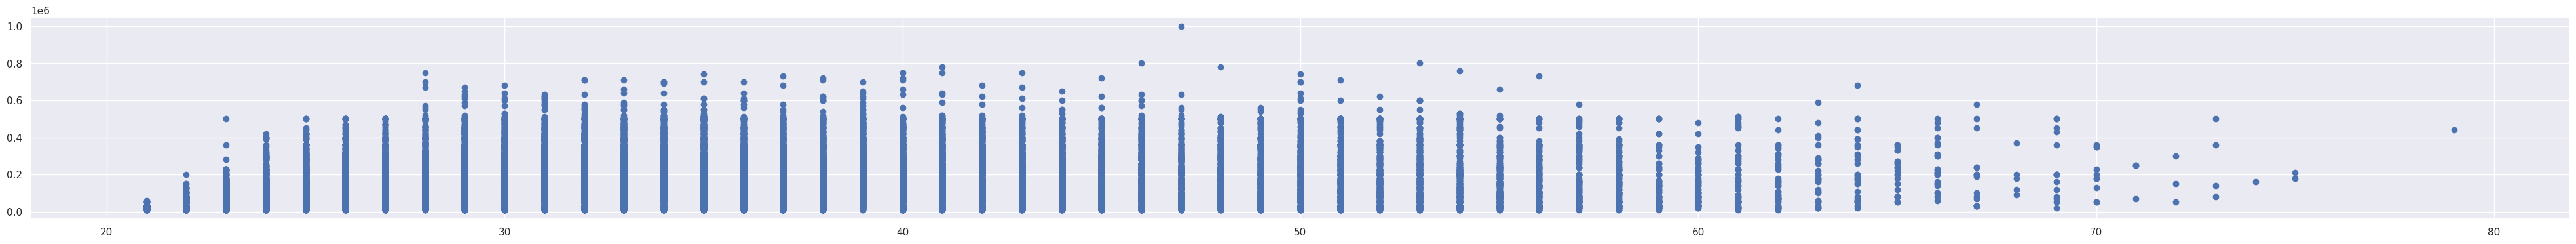

In [79]:
#1. scatter plot para la base de datos
plt.scatter(TCC1_num.age, TCC1_num.credit)
plt.show()

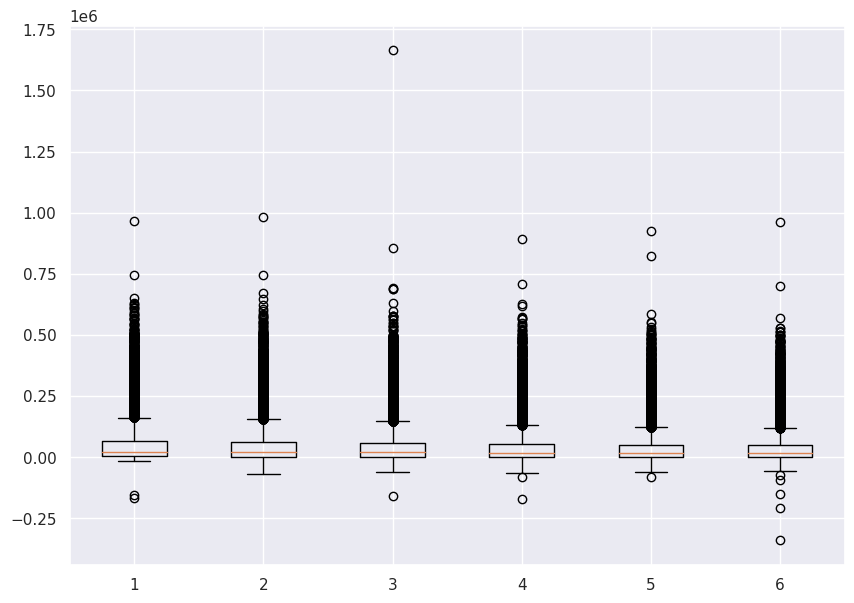

In [80]:
# Creating dataset

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot((TCC1_num.bill_sep, TCC1_num.bill_aug, TCC1_num.bill_jul, TCC1_num.bill_jun,TCC1_num.bill_may,TCC1_num.bill_apr))

# show plot
plt.show()

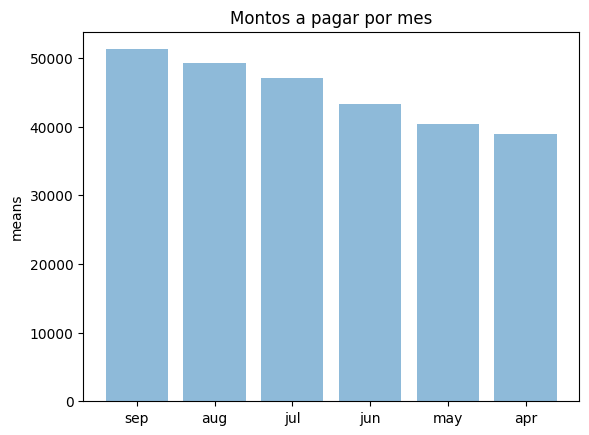

In [81]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ("sep", "aug", "jul", "jun","may","apr")
y_pos = np.arange(len(objects))
means = [TCC1_num.bill_sep.mean(), TCC1_num.bill_aug.mean(), TCC1_num.bill_jul.mean(), TCC1_num.bill_jun.mean(),TCC1_num.bill_may.mean(),TCC1_num.bill_apr.mean()]


plt.bar(y_pos, means, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('means')
plt.title('Montos a pagar por mes')

plt.show()

Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.


1. En la pimer gráfica scatter plot donde se analizan la relación de la cantidad de crédito contra la edad de los usuarios se puede ver que las edades predominantes son entre 30 a 50 anios de edad, lo que signifca que el banco debe fijarse en ese rango de edad, lo que tiene lógica al ser las edades más productivas.

2. La segunda gráfica muestra que se tienen bastentes datos anormales (outliers),lo que hace que se tenga una varianza muy alta. Cabe la pena revisar los datos, ya que hay varios datos negativos, osea saldos a favor en el data frame.

3. Finalmente la úlitma gráfica muestra que los meses finales del anio, la deuda aumenta, quizas por que se acumulan los saldos. Pudiendo generar una advertencia que los usuarios están usando más crédito del que sean capaces de pagar.